In [1]:
# k_means

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


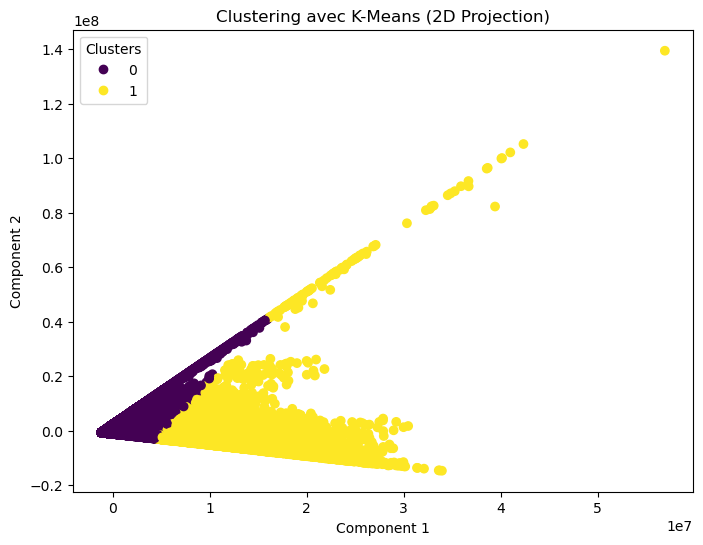

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor

# Chargement du dataset
df = pd.read_csv('../final_desequilibre.csv')

# Séparation des features (X) et de la variable cible (y)
X = df.drop('isFraud', axis=1)

# Détection des bruits avec LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  # Vous pouvez ajuster les paramètres
outlier_labels = lof.fit_predict(X)

# Supprimer les échantillons bruyants
X_cleaned = X[outlier_labels != -1]

# Créez un objet KMeans avec le nombre de clusters souhaité
num_clusters = 2  # Un seul cluster
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

# Appliquez K-Means sur les données nettoyées
kmeans.fit(X_cleaned)

# Obtenez les labels des clusters pour chaque échantillon
labels = kmeans.labels_


# Réduction de dimension avec l'ACP (2 dimensions)
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_cleaned)  # Utilisez X_cleaned ici pour la dimension réduite

# Créez un DataFrame pour les données réduites en dimension
df_2d = pd.DataFrame(X_2d, columns=['Component 1', 'Component 2'])

# Ajoutez les labels de clusters au DataFrame
df_2d['Cluster'] = labels

# Créez un graphique de dispersion en colorant les points par cluster
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_2d['Component 1'], df_2d['Component 2'], c=df_2d['Cluster'], cmap='viridis')
plt.title('Clustering avec K-Means (2D Projection)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()


In [11]:
# # Comptez le nombre d'échantillons dans le seul cluster
# cluster_counts = pd.Series(labels).value_counts()
# print("Nombre d'échantillons dans le cluster unique :")
# print(cluster_counts)

Le Silhouette Score est une métrique qui mesure la qualité d'une segmentation (clustering) en évaluant à quel point les objets au sein d'un même cluster sont similaires les uns aux autres par rapport à la distance qui les sépare des objets des autres clusters. Il fournit une mesure de la cohérence des clusters et peut aider à déterminer si les clusters sont bien définis et bien séparés.

Le Silhouette Score est calculé pour chaque point de données dans l'ensemble de données et varie de -1 à +1 :

Un score proche de +1 indique que le point est bien clusterisé et est loin des points des autres clusters, ce qui signifie une segmentation de haute qualité.
Un score proche de 0 indique que le point est proche de la frontière entre deux clusters, ce qui signifie que la segmentation n'est pas très claire.
Un score proche de -1 indique que le point a été attribué au mauvais cluster, ce qui signifie que la segmentation est incorrecte.

# Silhouette Score :

Le Silhouette Score mesure à quel point un point de données est similaire aux autres points dans son cluster par rapport à la distance moyenne entre ce point et les points du cluster voisin le plus proche. La formule est la suivante :

Silhouette Score pour un point i :

S(i) = (b(i) - a(i)) / max(a(i), b(i))

a(i) est la distance moyenne entre le point i et tous les autres points dans le même cluster.
b(i) est la distance moyenne entre le point i et les points du cluster voisin le plus proche (c'est-à-dire le cluster différent de celui auquel appartient i).
Le Silhouette Score global est la moyenne des Silhouette Scores pour tous les points de données.

# l'indice de silhouette
est une mesure qui évalue la qualité globale d'un clustering en utilisant à la fois des informations intra-cluster et inter-cluster. C'est une mesure qui prend en compte à la fois la cohésion intra-cluster et la séparation inter-cluster.

In [4]:
from sklearn.metrics import silhouette_score

# Calcul du coefficient de silhouette
silhouette_avg = silhouette_score(X_cleaned, labels)
print(f"Silhouette Score : {silhouette_avg}")


Silhouette Score : 0.8138120851113815


Les composantes principales (component 1, component 2, et component 3) dans l'analyse en composantes principales (PCA) représentent des combinaisons linéaires des variables originales de vos données qui capturent la plus grande part de la variance des données. Chaque composante principale est une nouvelle variable qui est une combinaison pondérée des variables originales. 